In [1]:
import math
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

import sys
sys.path.append('C:\\Users\\wang\\Desktop\\kaggle\\tqdm-master')
from tqdm import tqdm

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.
C:\Users\wang\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
INPUT_DIR = 'C:/Users/wang/Desktop/kaggle'


def plot_images_for_filenames(filenames, labels, rows=4):
    
    imgs=[]
    for filename in filenames:
        imgs.append(plt.imread(f'{INPUT_DIR}/train/{filename}'))
    return plot_images(imgs, labels, rows)
    
        
def plot_images(imgs, labels, rows=4):
    # Set figure to 13 inches x 8 inches
    figure = plt.figure(figsize=(13, 8))

    cols = len(imgs) // rows + 1

    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        if labels:
            subplot.set_title(labels[i], fontsize=16)
        plt.imshow(imgs[i], cmap='gray')

In [10]:
train_df = pd.read_csv('C:/Users/wang/Desktop/kaggle/train.csv')
train_df.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


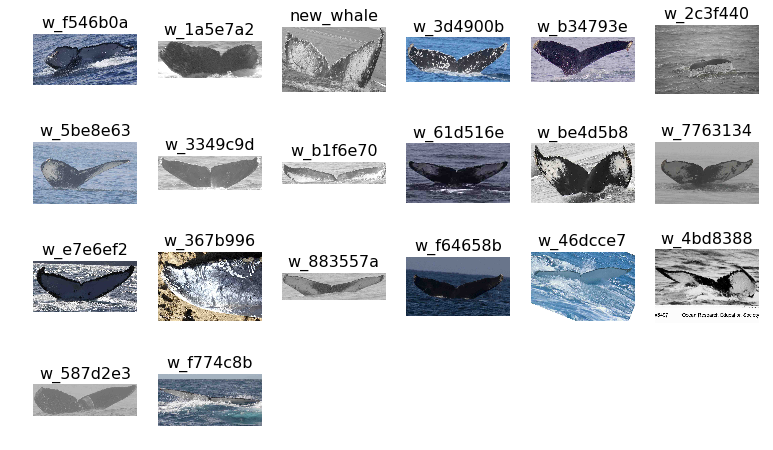

In [11]:
np.random.seed(10)
rand_rows_index = np.random.choice(train_df.index, 20, replace=False)
rand_rows = train_df.loc[rand_rows_index,:]
imgs = list(rand_rows['Image'])
labels = list(rand_rows['Id'])

plot_images_for_filenames(imgs, labels)

In [12]:
num_categories = len(train_df['Id'].unique())
num_categories, len(train_df)

(4251, 9850)

In [13]:
keys = train_df['Id'].value_counts()[train_df['Id'].value_counts()==1].index
len(keys)

2220

w_98baff9


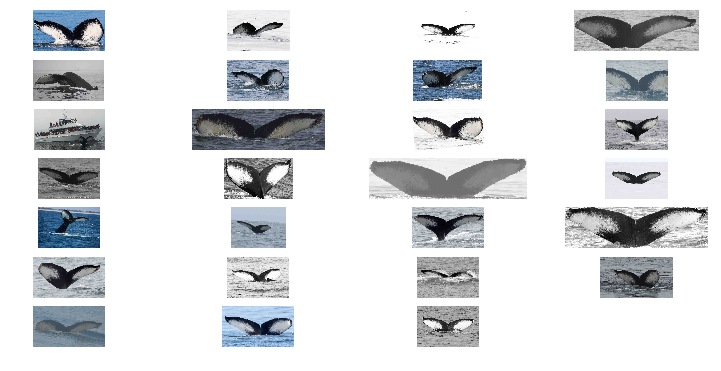

In [14]:
w_98baff9 = train_df[train_df['Id'] == 'w_98baff9']
print('w_98baff9')
plot_images_for_filenames(list(w_98baff9['Image']), None, rows=9)

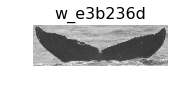

In [15]:
w_e3b236d = train_df[train_df['Id'] == 'w_e3b236d']
plot_images_for_filenames(list(w_e3b236d['Image']), list(w_e3b236d['Id']), rows=9)

In [16]:
train_df_one = train_df[train_df['Id'].isin(list(keys))]

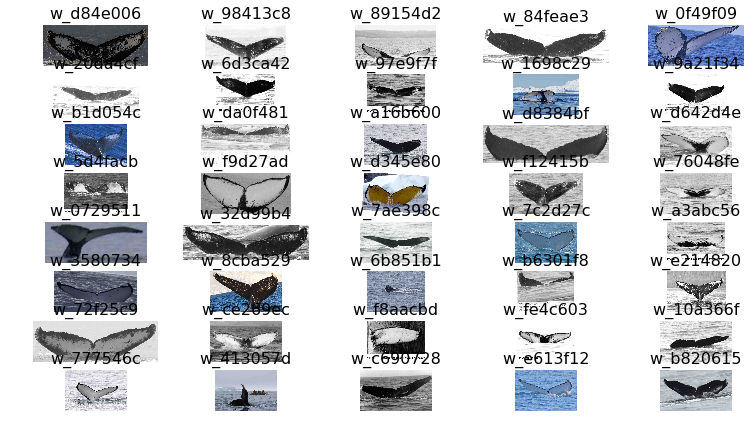

In [17]:
np.random.seed(10)
train_df_one_sample = train_df_one.loc[np.random.choice(train_df_one.index, 40, replace=False), :]
plot_images_for_filenames(list(train_df_one_sample['Image']), list(train_df_one_sample['Id']), rows=9)

In [18]:
def is_grey_scale(img_path):
    """Thanks to https://stackoverflow.com/questions/23660929/how-to-check-whether-a-jpeg-image-is-color-or-gray-scale-using-only-python-stdli"""
    im = Image.open(img_path).convert('RGB')
    w,h = im.size
    for i in range(w):
        for j in range(h):
            r,g,b = im.getpixel((i,j))
            if r != g != b: return False
    return True

In [19]:
len_grey = sum([is_grey_scale(f'{INPUT_DIR}/train/{filename}') for filename in list(train_df_one_sample['Image'])])
ratio = len_grey / len(train_df_one_sample)

In [72]:
ratio

0.6

In [20]:
from keras.preprocessing.image import (
    random_rotation, random_shift, random_shear, random_zoom,
    random_channel_shift, transform_matrix_offset_center, img_to_array)

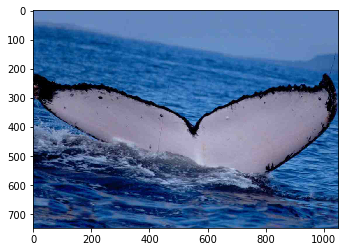

In [25]:
img = Image.open(f'{INPUT_DIR}/train/ff38054f.jpg')
img_arr = img_to_array(img)
plt.imshow(img)

In [61]:
img_arr.shape

(748, 1050, 3)

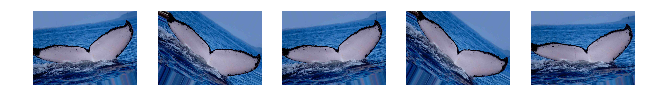

In [58]:
imgs = [
    random_rotation(img_arr, 30, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') / 255
    for _ in range(5)]
plot_images(imgs, None, rows=1)

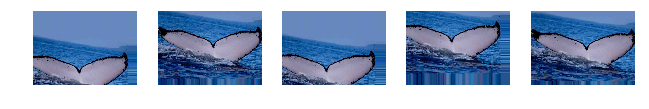

In [60]:
imgs = [
    random_shift(img_arr, wrg=0.1, hrg=0.3, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') / 255
    for _ in range(5)]
plot_images(imgs, None, rows=1)

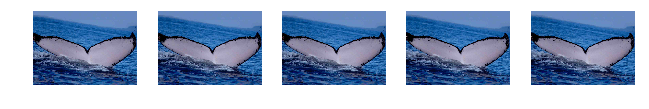

In [63]:
imgs = [
    random_shear(img_arr, intensity=0.4, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') / 255
    for _ in range(5)]
plot_images(imgs, None, rows=1)

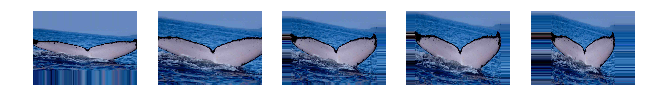

In [67]:
imgs = [
    random_zoom(img_arr, zoom_range=(2, 0.7), row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') / 255
    for _ in range(5)]
plot_images(imgs, None, rows=1)

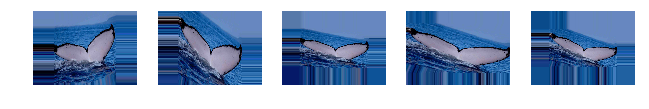

In [70]:
def augmentation_pipeline(img_arr):
    img_arr = random_rotation(img_arr, 18, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest')
    img_arr = random_shear(img_arr, intensity=0.4, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest')
    img_arr = random_zoom(img_arr, zoom_range=(0.9, 2.0), row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest')
    

    return img_arr
imgs = [augmentation_pipeline(img_arr) / 255 for _ in range(5)]
plot_images(imgs, None, rows=1)

In [72]:

X = [import_images(filename) for filename in list(train_df['Image'])]

In [4]:
#====================================This part does the network training using cropped images================================
#===============================================in separate .py file===========================================================


import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from PIL import Image
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator




INPUT_DIR_TRAIN = '/home/nick/kg/train_cropped'
INPUT_DIR_TEST = '/home/nick/kg/test_cropped'
data = pd.read_csv(f'/home/nick/kg/train.csv')
test = pd.read_csv(f'/home/nick/kg/sample_submission.csv')
train = data.copy()
train["Image"] = train["Image"].map( lambda x : "/home/nick/kg/train_cropped"+x)
ImageToLabelDict = dict( zip( train["Image"], train["Id"]))
SIZE = 128

In [5]:

def import_images(filename):
    SIZE = 128
    img = Image.open(f'{INPUT_DIR_TRAIN}/{filename}')
    img_arr = np.array(img)
    img_arr = np.resize(img_arr, [SIZE,SIZE])
    img_arr = img_arr.astype('float32')
    return img_arr /255

In [6]:

X_train = [import_images(filename) for filename in list(train['Image'])]
Y_train = list(train['Id'])


In [9]:
X_train = np.array(X_train).reshape((-1,SIZE,SIZE,1))


(9850, 28, 28, 1)

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_1 = LabelEncoder()
onehotencoder_y_1 = OneHotEncoder()
Y_train_1 = labelencoder_y_1.fit_transform(Y_train)
Y_train_2 = onehotencoder_y_1.fit_transform(Y_train_1.reshape(-1, 1))
Y_train_final=Y_train_2

In [35]:
Y_train_2.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
image_gen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rescale=1./255,
    rotation_range=15,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range = 0.5)

#training the image preprocessing
image_gen.fit(X_train, augment=True)



In [30]:
k_size = (4,4)
pool_size = (2,2)
batch_size = 32
num_classes = len(Y_train)
epochs = 10
input_shape = (SIZE, SIZE, 1)

print('x_train samples:', len(X_train))
print('y_train samples:', len(Y_train))


x_train samples: 9850
y_train samples: 9850


In [67]:
# NETWORK
model = Sequential()
model.add(Conv2D(48, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(48, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(48, (5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.33))
model.add(Flatten())
model.add(Dense(36, activation='sigmoid'))
model.add(Dropout(0.33))
model.add(Dense(36, activation='sigmoid'))
model.add(Dense(len(Y_train_final.toarray()[0]), activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 48)        480       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 48)        20784     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 48)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 48)          57648     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 48)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 2, 48)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 192)               0         
__________

In [61]:
model.fit_generator(image_gen.flow( X_train, Y_train_final.toarray(), batch_size=batch_size), epochs=epochs, verbose=1)
model.save('Final.model')
print('Best model written to file!')
print('All complete!')

In [ ]:
#===========================================This part does the model prediction using the trained model==================================
#============================================================in separate .py file===================================================================
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from PIL import Image
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.models import load_model

INPUT_DIR_TEST = '/home/nick/kg/test_cropped'
SIZE = 128
from keras.models import load_model
model = load_model('/home/nick/kg/Final_708.model')


train_images = glob("/home/nick/kg/train_cropped/*jpg")


data = pd.read_csv(f'/home/nick/kg/train.csv')
train = data.copy()
train["Image"] = train["Image"].map( lambda x : "/home/nick/kg/train_cropped/"+x)
ImageToLabelDict = dict( zip( train["Image"], train["Id"]))


class LabelOneHotEncoder():
    def __init__(self):
        self.ohe = OneHotEncoder()
        self.le = LabelEncoder()
    def fit_transform(self, x):
        features = self.le.fit_transform( x)
        return self.ohe.fit_transform( features.reshape(-1,1))
    def transform( self, x):
        return self.ohe.transform( self.la.transform( x.reshape(-1,1)))
    def inverse_tranform( self, x):
        return self.le.inverse_transform( self.ohe.inverse_tranform( x))
    def inverse_labels( self, x):
        return self.le.inverse_transform( x)

y = list(map(ImageToLabelDict.get, train_images))
lohe = LabelOneHotEncoder()
y_cat = lohe.fit_transform(y)



def import_images(filename):
    SIZE = 128
    img = Image.open(f'{INPUT_DIR_TEST}/{filename}')
    img_arr = np.array(img)
    img_arr = np.resize(img_arr, [SIZE,SIZE])
    
    return img_arr /255







import warnings
from os.path import split

print('Writing prediction to file...')
test = pd.read_csv(f'/home/nick/kg/sample_submission.csv')
with open("/home/nick/kg/final_submission.csv","w") as f:
    with warnings.catch_warnings():
        f.write("Image,Id\n")
        warnings.filterwarnings("ignore",category=DeprecationWarning)
        for image in list(test['Image']):
            img = import_images(image)
            
            #applying preprocessing to test images
            img = np.array(img).reshape((1,SIZE,SIZE,1))
            y = model.predict_proba(img)
            predicted_args = np.argsort(y)[0][::-1][:5]
            predicted_tags = lohe.inverse_labels( predicted_args)
            image = split(image)[-1]
            predicted_tags = " ".join( predicted_tags)
            f.write("%s,%s\n" %(image, predicted_tags))
print('Final predicted labels written to file!')
print('All complete!')

In [10]:
with open('C:/Users/wang/Desktop/kaggle/cropping.txt', 'rt') as f: data = f.read().split('\n')[:-1]
len(data) # Number of rows in the dataset

1200

In [11]:
data = [line.split(',') for line in data]

In [12]:
data1 = [(p,[(int(coord[i]), int(coord[i+1])) for i in range(0, len(coord), 2)]) for p,*coord in data] 

In [13]:
data1[0]

('88532e70.jpg',
 [(195, 293),
  (269, 115),
  (868, 158),
  (888, 170),
  (641, 496),
  (512, 546),
  (321, 524)])

In [49]:
from PIL import Image as pil_image
from PIL.ImageDraw import Draw

def read_raw_image(p):
    return pil_image.open('C:/Users/wang/Desktop/kaggle/train/' + p)

def draw_dot(draw, x, y):
    draw.ellipse(((x-5,y-5),(x+5,y+5)), fill='red', outline='red')

def draw_dots(draw, coordinates):
    for x,y in coordinates: draw_dot(draw, x, y)

filename,coordinates = data1[0]
img = read_raw_image(filename)
draw = Draw(img)
draw_dots(draw, coordinates)
img
def bounding_rectangle(list):
    x0, y0 = list[0]
    x1, y1 = x0, y0
    for x,y in list[1:]:
        x0 = min(x0, x)
        y0 = min(y0, y)
        x1 = max(x1, x)
        y1 = max(y1, y)
    return x0,y0,x1,y1

box = bounding_rectangle(coordinates)
box

(195, 115, 888, 546)

In [50]:
draw.rectangle(box, outline='red')


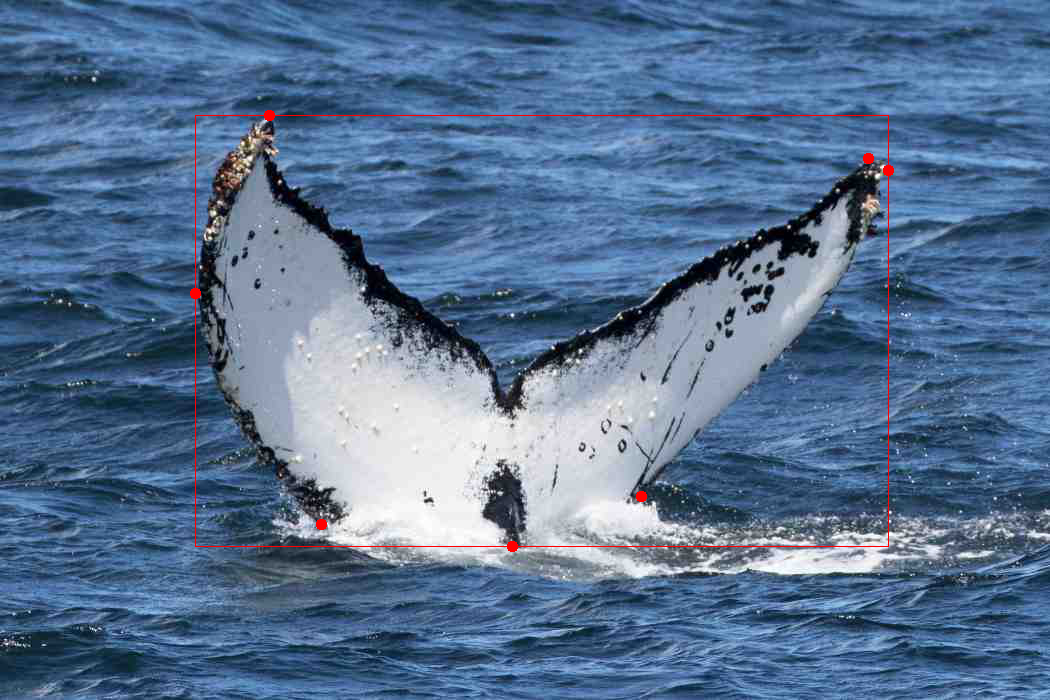

In [51]:

from keras.preprocessing.image import img_to_array,array_to_img


import numpy as np
from numpy.linalg import inv
from scipy.ndimage import affine_transform

def transform_img(x, affine):
    matrix   = affine[:2,:2]
    offset   = affine[:2,2]
    x        = np.moveaxis(img_to_array(x), -1, 0) # Change to channel first
    channels = [affine_transform(channel, matrix, offset, order=1, mode='constant', cval=np.average(channel)) for channel in x]
    return array_to_img(np.moveaxis(np.stack(channels, axis=0), 0, -1)) # Back to channel last, and image format

width, height = img.size
rotation = np.deg2rad(10)
# Place the origin at the center of the image
center = np.array([[1, 0, -height/2], [0, 1, -width/2], [0, 0, 1]]) 
# Rotate
rotate = np.array([[np.cos(rotation), np.sin(rotation), 0], [-np.sin(rotation), np.cos(rotation), 0], [0, 0, 1]])
# Restaure the origin
decenter = inv(center)
# Combine the transformations into one
m   = np.dot(decenter, np.dot(rotate, center))
img = transform_img(img, m)
img

In [55]:
img1 = img.convert('L')
img1 = img_to_array(img1)
img1.shape

(700, 1050, 1)

In [59]:
img_crop  = img.convert('L').crop(box)

In [65]:
filename
INPUT_DIR = 'C:/Users/wang/Desktop/kaggle'
img_crop.save(f'{INPUT_DIR}/{filename}')

In [69]:
filename

'88532e70.jpg'